In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import hashlib

PATH = 'sales_2019-09-01_2020-12-07.csv'
PATH_2 = 'customers_export_1.csv'

df = pd.read_csv(PATH, delimiter=',')
df_2 = pd.read_csv(PATH_2, delimiter=',')

df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,customer_name,customer_email,orders,gross_sales,net_sales,total_sales,average_order_value
0,Tara Manini,tmanini@hotmail.com,29,3637.39,3413.45,3807.53,136.755
1,Josephine Sivertsson,josephine.sivertsson@hotmail.com,46,3285.04,3131.73,3611.43,78.574
2,Alba Ortiz Reyes,aortiz258@hotmail.com,36,3492.10,3299.65,3434.52,99.054
3,Willimae Villajin,maw105_92@yahoo.com,42,2703.42,2663.43,3193.07,76.807
4,Kereka Guidry,k.guidry1992@gmail.com,33,2792.51,2614.34,2784.17,84.368


In [ ]:
df[df['total_sales'] <= 0 ].head(10)

,customer_name,customer_email,orders,gross_sales,net_sales,total_sales,average_order_value
12940,Jillian russell Lagueras,pose1don.xroot@gmail.com,1,49.99,0.0,0.0,65.98
12941,Karina Sanchez,michell0816@hotmail.com,1,41.98,0.0,0.0,54.97
12942,Jeamhil Aninag,lihmaej008@yahoo.com,1,29.99,0.0,0.0,29.99
12943,Samantha Hazard,Sammiejanehaz03@gmail.com,2,99.98,0.0,0.0,0.00
12944,SiJin Lee,songcookie@gmail.com,1,30.00,0.0,0.0,35.00
12945,Esther Choe,esther3406@gmail.com,1,137.93,0.0,0.0,124.65
12946,Maya Riverin,m.riverin1978@gmail.com,1,44.97,0.0,0.0,57.96
12947,Manuela Roeder,dreckspatz@gmail.com,1,31.99,0.0,0.0,44.98
12948,Nadia Corino,nadj77@yahoo.com,3,0.00,0.0,0.0,0.00
12949,Cameron Hession,cameronhession@gmail.com,1,46.99,0.0,0.0,51.29


In [ ]:
df.describe()

,orders,gross_sales,net_sales,total_sales,average_order_value
count,13287.000000,13287.000000,13287.000000,13287.000000,13287.000000
mean,2.637766,151.126071,143.554811,155.907068,64.919779
std,2.923295,189.662922,180.273146,192.712591,38.696895
min,0.000000,0.000000,-179.960000,-179.960000,0.000000
25%,1.000000,47.980000,43.980000,49.990000,44.990000
50%,1.000000,99.980000,94.980000,99.980000,53.156000
75%,3.000000,186.085000,179.960000,193.005000,69.990000
max,46.000000,3637.390000,3413.450000,3807.530000,723.590000


In [ ]:
df.count()

customer_name          13281
customer_email         13265
orders                 13287
gross_sales            13287
net_sales              13287
total_sales            13287
average_order_value    13287
dtype: int64

In [ ]:
# adding average order value

df['average_order_value'] = df['total_sales'] / df['orders']

In [ ]:
df1 = df[df.isna().any(axis=1)]
values = {'customer_name': 'none', 'customer_email': 'none'}
df = df.fillna(value=values)

In [ ]:
# remove all customers that have a total_sales <= 0
df = df[df['total_sales'] > 0]

In [ ]:
total_customer = df['orders'].count() 
total_orders_quantity =  df['orders'].sum()

In [ ]:
df['orders'].sum()

34479

In [ ]:
# total purchase freq

total_purchase_freq = total_orders_quantity / total_customer 
total_purchase_freq

2.664528593508501

In [ ]:
# adding customer value

df['customer_value'] = (df['average_order_value'] * total_purchase_freq) / 16

In [ ]:
df.describe()

,orders,gross_sales,net_sales,total_sales,average_order_value,customer_value
count,12940.000000,12940.000000,12940.00000,12940.000000,12940.000000,12940.000000
mean,2.664529,153.405488,147.44913,160.130155,64.430450,10.729799
std,2.952397,190.647825,181.06451,193.510671,37.675361,6.274192
min,1.000000,4.990000,-17.51000,2.680000,0.670000,0.111577
25%,1.000000,49.990000,45.99000,50.415000,44.990000,7.492321
50%,1.000000,99.980000,97.17000,99.980000,52.990000,8.824586
75%,3.000000,195.987500,179.97000,197.062500,69.727083,11.611863
max,46.000000,3637.390000,3413.45000,3807.530000,522.570000,87.025169


In [ ]:
df

,customer_name,customer_email,orders,gross_sales,net_sales,total_sales,average_order_value,customer_value
0,Tara Manini,tmanini@hotmail.com,29,3637.39,3413.45,3807.53,131.294138,21.864812
1,Josephine Sivertsson,josephine.sivertsson@hotmail.com,46,3285.04,3131.73,3611.43,78.509348,13.074400
2,Alba Ortiz Reyes,aortiz258@hotmail.com,36,3492.10,3299.65,3434.52,95.403333,15.887807
3,Willimae Villajin,maw105_92@yahoo.com,42,2703.42,2663.43,3193.07,76.025476,12.660753
4,Kereka Guidry,k.guidry1992@gmail.com,33,2792.51,2614.34,2784.17,84.368788,14.050190
...,...,...,...,...,...,...,...,...
12935,Melissa Figueroa,melissafigueroa503@gmail.com,1,7.00,7.00,7.00,7.000000,1.165731
12936,Federica Manfredini,cioppolollola@gmail.com,1,7.00,7.00,7.00,7.000000,1.165731
12937,Sarah Toussaint,toussaint.sarah@outlook.fr,1,7.00,7.00,7.00,7.000000,1.165731
12938,Savy Nouv Becerra,savynouv@outlook.com,1,90.99,0.00,4.99,4.990000,0.831000


In [ ]:
lifespan6 = 6
lifespan18 =18
lifespan3yr = 36

lifespan = [6, 18, 36]



In [ ]:
for l in lifespan:
  df['lifetime_value_' + str(l)] = df['customer_value'] * l 

In [ ]:
df.head(50)

,customer_name,customer_email,orders,gross_sales,net_sales,total_sales,average_order_value,customer_value,lifetime_value_6,lifetime_value_18,lifetime_value_36
0,Tara Manini,tmanini@hotmail.com,29,3637.39,3413.45,3807.53,131.294138,21.864812,131.188869,393.566608,787.133216
1,Josephine Sivertsson,josephine.sivertsson@hotmail.com,46,3285.04,3131.73,3611.43,78.509348,13.074400,78.446401,235.339202,470.678405
2,Alba Ortiz Reyes,aortiz258@hotmail.com,36,3492.10,3299.65,3434.52,95.403333,15.887807,95.326841,285.980523,571.961047
3,Willimae Villajin,maw105_92@yahoo.com,42,2703.42,2663.43,3193.07,76.025476,12.660753,75.964521,227.893562,455.787124
4,Kereka Guidry,k.guidry1992@gmail.com,33,2792.51,2614.34,2784.17,84.368788,14.050190,84.301143,252.903429,505.806857
5,Courtney Wirtz,lynne1021@gmail.com,29,3014.33,2537.03,2608.96,89.964138,14.982001,89.892007,269.676020,539.352040
6,Megan Butler Stoney,megan_kay@live.com,42,2461.48,2257.22,2558.98,60.928095,10.146541,60.879244,182.637733,365.275467
7,Hannah Horejsi,bannana_1444@hotmail.com,41,2005.70,1960.53,2273.24,55.444878,9.233404,55.400424,166.201271,332.402542
8,Leah Mejia,leahakers@live.com,17,2123.60,2035.02,2078.98,122.292941,20.365815,122.194889,366.584668,733.169337
9,Samantha Harkiewicz,sharkiewicz2958@yahoo.com,33,1927.21,1826.93,2065.70,62.596970,10.424463,62.546781,187.640343,375.280685


## Normalize

In [ ]:
df.describe()

,orders,gross_sales,net_sales,total_sales,average_order_value,customer_value,lifetime_value_6,lifetime_value_18,lifetime_value_36
count,12940.000000,12940.000000,12940.00000,12940.000000,12940.000000,12940.000000,12940.000000,12940.000000,12940.000000
mean,2.664529,153.405488,147.44913,160.130155,64.430450,10.729799,64.378791,193.136374,386.272748
std,2.952397,190.647825,181.06451,193.510671,37.675361,6.274192,37.645154,112.935461,225.870923
min,1.000000,4.990000,-17.51000,2.680000,0.670000,0.111577,0.669463,2.008388,4.016777
25%,1.000000,49.990000,45.99000,50.415000,44.990000,7.492321,44.953928,134.861784,269.723568
50%,1.000000,99.980000,97.17000,99.980000,52.990000,8.824586,52.947514,158.842541,317.685083
75%,3.000000,195.987500,179.97000,197.062500,69.727083,11.611863,69.671178,209.013533,418.027066
max,46.000000,3637.390000,3413.45000,3807.530000,522.570000,87.025169,522.151015,1566.453045,3132.906091


In [ ]:
df_normalized = (df - df.mean()) / df.std()
df_normalized.describe()

,average_order_value,customer_value,gross_sales,lifetime_value_18,lifetime_value_36,lifetime_value_6,net_sales,orders,total_sales
count,1.294000e+04,1.294000e+04,1.294000e+04,1.294000e+04,1.294000e+04,1.294000e+04,1.294000e+04,1.294000e+04,1.294000e+04
mean,2.099855e-13,3.884210e-14,8.874035e-14,5.152730e-14,5.152730e-14,3.071826e-14,7.282879e-14,-4.770823e-15,1.016643e-13
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.692365e+00,-1.692365e+00,-7.784798e-01,-1.692365e+00,-1.692365e+00,-1.692365e+00,-9.110517e-01,-5.637889e-01,-8.136510e-01
25%,-5.159990e-01,-5.159990e-01,-5.424425e-01,-5.159990e-01,-5.159990e-01,-5.159990e-01,-5.603480e-01,-5.637889e-01,-5.669721e-01
50%,-3.036587e-01,-3.036587e-01,-2.802313e-01,-3.036587e-01,-3.036587e-01,-3.036587e-01,-2.776863e-01,-5.637889e-01,-3.108364e-01
75%,1.405861e-01,1.405861e-01,2.233543e-01,1.405861e-01,1.405861e-01,1.405861e-01,1.796093e-01,1.136268e-01,1.908543e-01
max,1.216019e+01,1.216019e+01,1.827445e+01,1.216019e+01,1.216019e+01,1.216019e+01,1.803777e+01,1.467806e+01,1.884857e+01


In [ ]:
from sklearn.cluster import KMeans

kmeans_settings = {
    'algorithm': 'manual',
    'copy_x': True,
    'init': 'k-means++',
    'max_iter': 300,
    'n_clusters': 'manual',
    'n_init': 10,
    'n_jobs': None,
    'precompute_distances': 'auto',
    'random_state': 40,
    'tol': 0.0001,
    'verbose': 0
}

# kmeans = KMeans(**kmeans_settings).fit(df_normalized[["Total Orders", "Total Spent", "AvgOrderValue"]])

X = df_normalized[['average_order_value', 'customer_value', 'orders', 'total_sales', 'lifetime_value_6', 'lifetime_value_18', 'lifetime_value_36']]
kmeans = KMeans(n_clusters = 4, random_state=40).fit(X)

In [ ]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=40, tol=0.0001, verbose=0)

In [ ]:
# from sklearn.metrics import silhouette_score

# for n_cluster in range(2, 12):
#   kmeans = KMeans(n_clusters=n_cluster).fit(
#     X
#   )
#   silhouette_avg = silhouette_score(
#       X,
#       kmeans.labels_
#   )
#   print('Silhouette score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))

In [ ]:
four_cluster_df = X.copy(deep=True)
four_cluster_df['Cluster'] = kmeans.labels_

In [ ]:
four_cluster_df.head()

,average_order_value,customer_value,orders,total_sales,lifetime_value_6,lifetime_value_18,lifetime_value_36,Cluster
0,1.774733,1.774733,8.920030,18.848572,1.774733,1.774733,1.774733,0
1,0.373690,0.373690,14.678063,17.835191,0.373690,0.373690,0.373690,0
2,0.822099,0.822099,11.290985,16.920978,0.822099,0.822099,0.822099,0
3,0.307762,0.307762,13.323232,15.673243,0.307762,0.307762,0.307762,0
4,0.529214,0.529214,10.274861,13.560182,0.529214,0.529214,0.529214,0


In [ ]:
four_cluster_df.groupby('Cluster').count().sort_values(by='lifetime_value_6')['lifetime_value_6']

Cluster
3     141
1    1668
0    1682
2    9449
Name: lifetime_value_6, dtype: int64

In [ ]:
list(four_cluster_df.columns)

['average_order_value',
 'customer_value',
 'orders',
 'total_sales',
 'lifetime_value_6',
 'lifetime_value_18',
 'lifetime_value_36',
 'Cluster']

In [ ]:
alt_df = pd.DataFrame()
alt_df['Cluster'] = kmeans.labels_

del four_cluster_df['Cluster']
four_cluster_df

,average_order_value,customer_value,orders,total_sales,lifetime_value_6,lifetime_value_18,lifetime_value_36
0,1.774733,1.774733,8.920030,18.848572,1.774733,1.774733,1.774733
1,0.373690,0.373690,14.678063,17.835191,0.373690,0.373690,0.373690
2,0.822099,0.822099,11.290985,16.920978,0.822099,0.822099,0.822099
3,0.307762,0.307762,13.323232,15.673243,0.307762,0.307762,0.307762
4,0.529214,0.529214,10.274861,13.560182,0.529214,0.529214,0.529214
...,...,...,...,...,...,...,...
12935,-1.524350,-1.524350,-0.563789,-0.791327,-1.524350,-1.524350,-1.524350
12936,-1.524350,-1.524350,-0.563789,-0.791327,-1.524350,-1.524350,-1.524350
12937,-1.524350,-1.524350,-0.563789,-0.791327,-1.524350,-1.524350,-1.524350
12938,-1.577701,-1.577701,-0.563789,-0.801714,-1.577701,-1.577701,-1.577701


In [ ]:
label

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [ ]:
import itertools 
import pandas as pd

list(itertools.combinations(four_cluster_df.columns, 2))

[('average_order_value', 'customer_value'),
 ('average_order_value', 'orders'),
 ('average_order_value', 'total_sales'),
 ('average_order_value', 'lifetime_value_6'),
 ('average_order_value', 'lifetime_value_18'),
 ('average_order_value', 'lifetime_value_36'),
 ('customer_value', 'orders'),
 ('customer_value', 'total_sales'),
 ('customer_value', 'lifetime_value_6'),
 ('customer_value', 'lifetime_value_18'),
 ('customer_value', 'lifetime_value_36'),
 ('orders', 'total_sales'),
 ('orders', 'lifetime_value_6'),
 ('orders', 'lifetime_value_18'),
 ('orders', 'lifetime_value_36'),
 ('total_sales', 'lifetime_value_6'),
 ('total_sales', 'lifetime_value_18'),
 ('total_sales', 'lifetime_value_36'),
 ('lifetime_value_6', 'lifetime_value_18'),
 ('lifetime_value_6', 'lifetime_value_36'),
 ('lifetime_value_18', 'lifetime_value_36')]

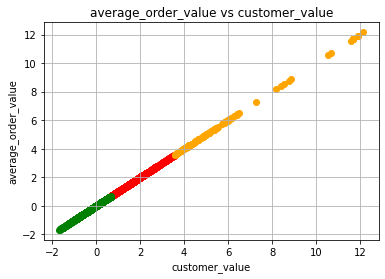

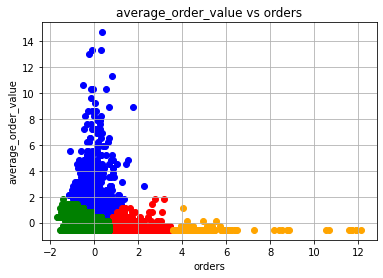

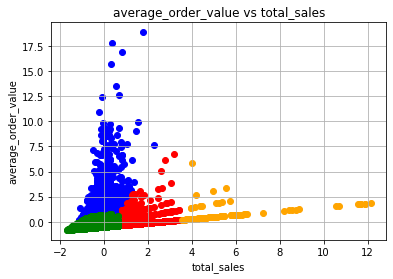

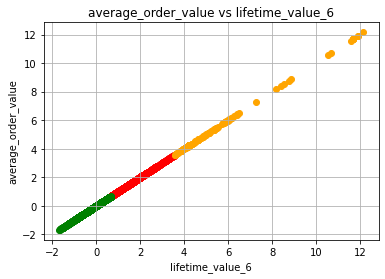

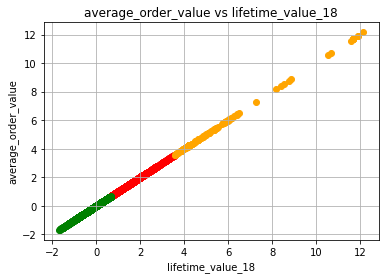

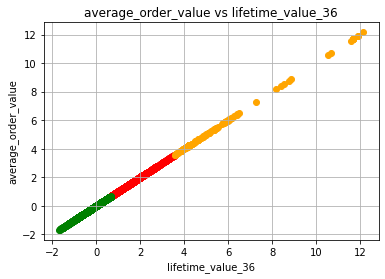

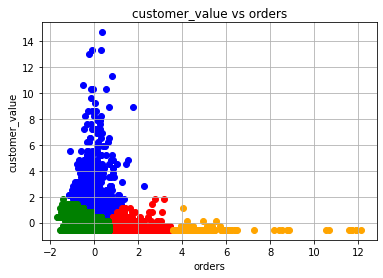

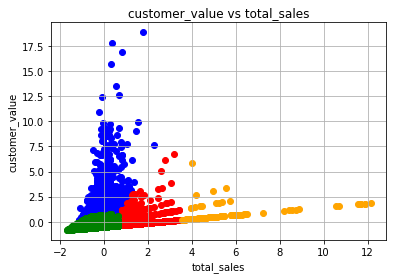

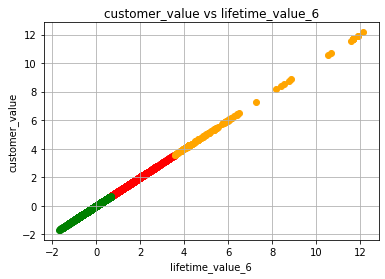

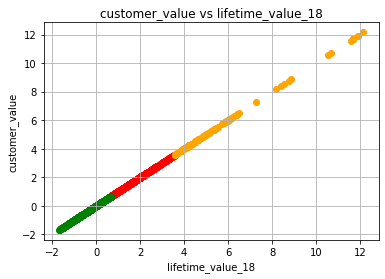

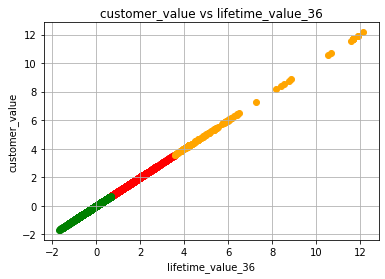

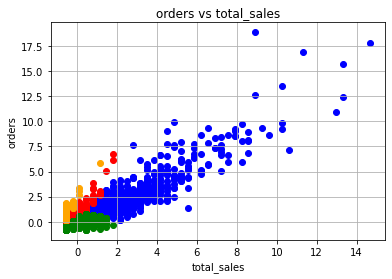

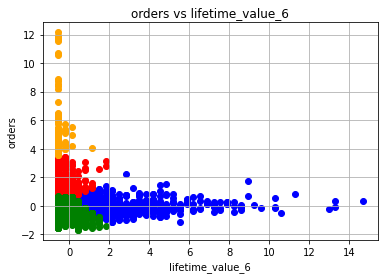

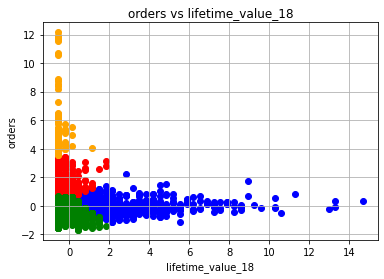

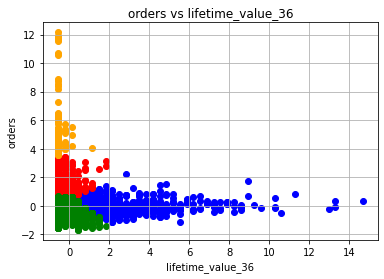

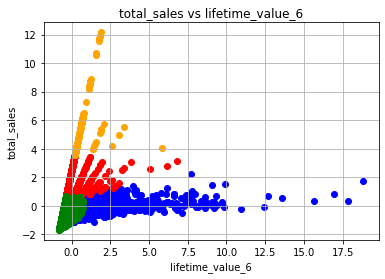

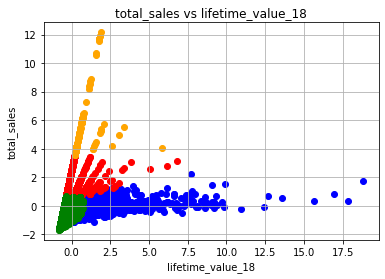

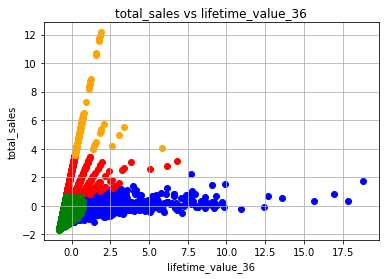

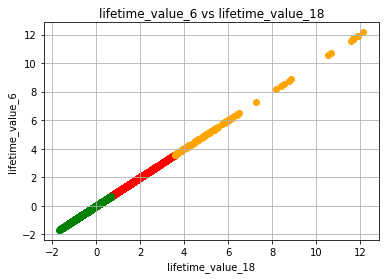

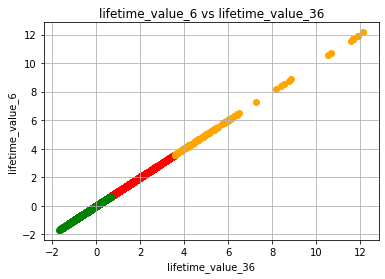

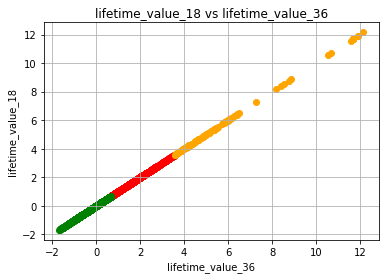

In [ ]:
col_pairs = list(itertools.combinations(four_cluster_df.columns, 2))
models = []
results = []
for a, b in col_pairs:
  plt.scatter(
    four_cluster_df.loc[alt_df['Cluster'] == 0][str(a)], 
    four_cluster_df.loc[alt_df['Cluster'] == 0][str(b)],
    c='blue'
  )
  plt.scatter(
    four_cluster_df.loc[alt_df['Cluster'] == 1][str(a)], 
    four_cluster_df.loc[alt_df['Cluster'] == 1][str(b)],
    c='red'
  )
  plt.scatter(
    four_cluster_df.loc[alt_df['Cluster'] == 2][str(a)], 
    four_cluster_df.loc[alt_df['Cluster'] == 2][str(b)],
    c='green'
  )
  plt.scatter(
    four_cluster_df.loc[alt_df['Cluster'] == 3][str(a)], 
    four_cluster_df.loc[alt_df['Cluster'] == 3][str(b)],
    c='orange'
  )
  plt.title(str(a) + ' vs ' + str(b))
  plt.xlabel(str(b))
  plt.ylabel(str(a))

  plt.grid()
  plt.show()
  

## Cluster Analysis
